In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


Import Necessary Libraries

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import math

Importing the dataset and generating statistics summmary

In [29]:
df=pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
print(df.info())
print("\n")
print(df.describe())
df['Age']=df['Age'].fillna(df['Age'].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486

Plotting Histograms and Boxplots for Numeric Features

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


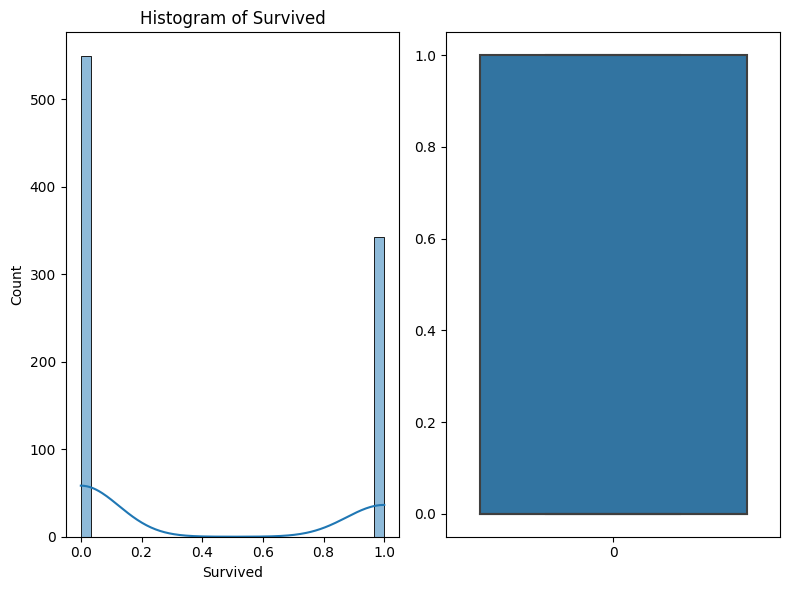

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


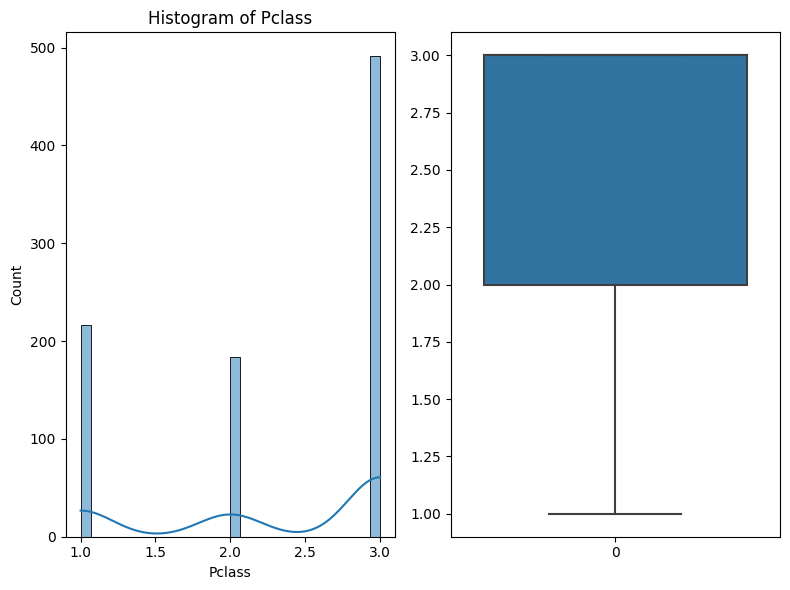

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


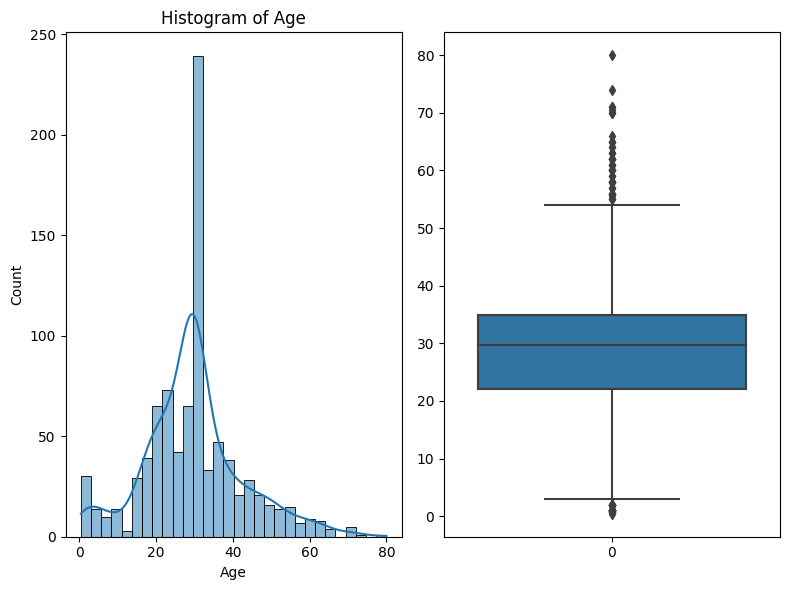

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


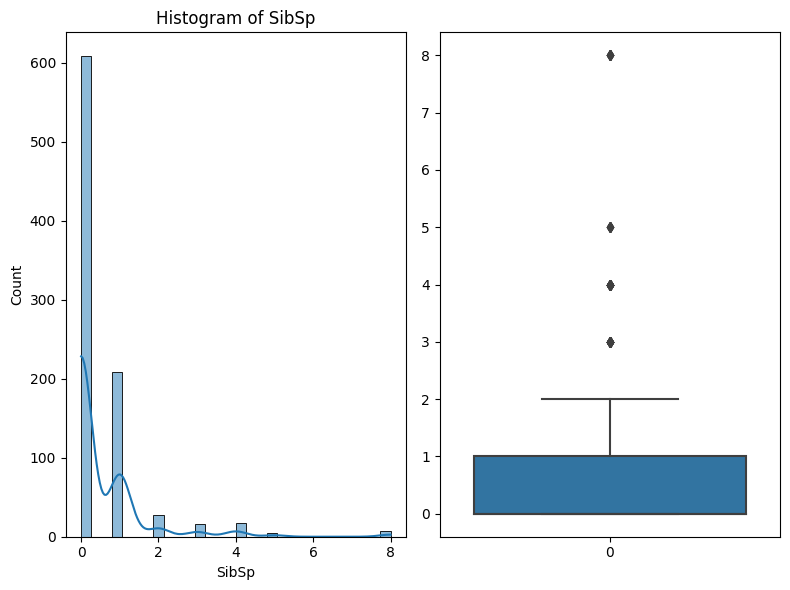

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


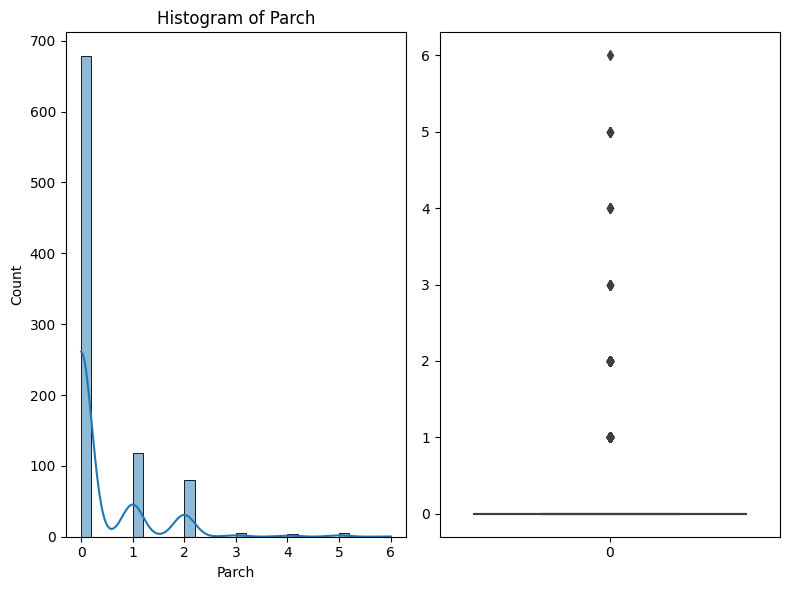

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


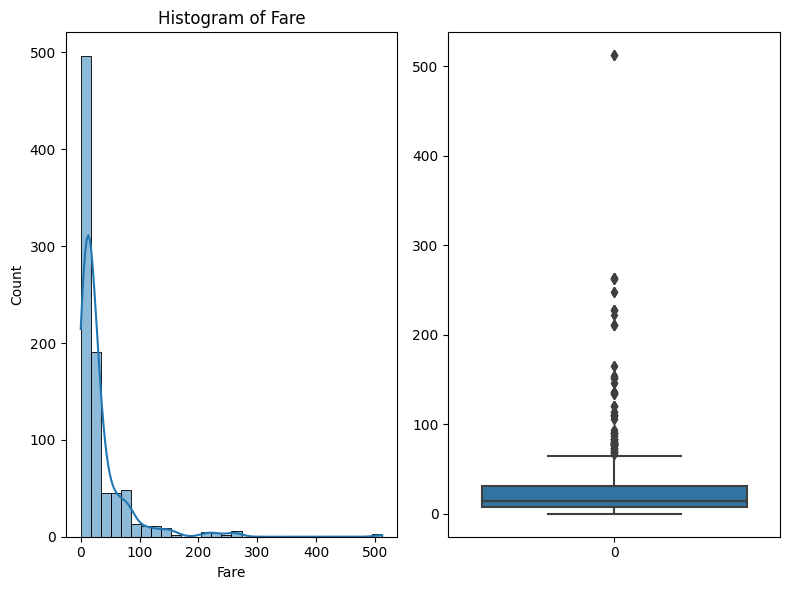

In [26]:
numeric_cols=df.select_dtypes(include=['int64','float64'])
numeric_cols=numeric_cols.drop(columns="PassengerId")
for col in numeric_cols:
    fig, axes = plt.subplots(1,2,figsize=(8,6))
    #Histogram
    
    sns.histplot(df[col], kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")
    axes[0].set_xlabel(f"{col}")

    sns.boxplot(df[col],ax=axes[1])
    axes[0].set_title(f"Histogram of {col}")
    axes[0].set_xlabel(f"{col}")

    plt.tight_layout()
    plt.show()
    
    



In [27]:
le=LabelEncoder()
cat_features=df[['Sex','Embarked']]
cat_features['Sex']=le.fit_transform(cat_features['Sex'])
cat_features['Embarked']=le.fit_transform(cat_features['Embarked'])

combined_df=pd.concat([numeric_cols,cat_features],axis=1)

/tmp/ipykernel_31/3749305869.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_features['Sex']=le.fit_transform(cat_features['Sex'])
/tmp/ipykernel_31/3749305869.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_features['Embarked']=le.fit_transform(cat_features['Embarked'])


Plotting PairPlots and Correlation Map

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

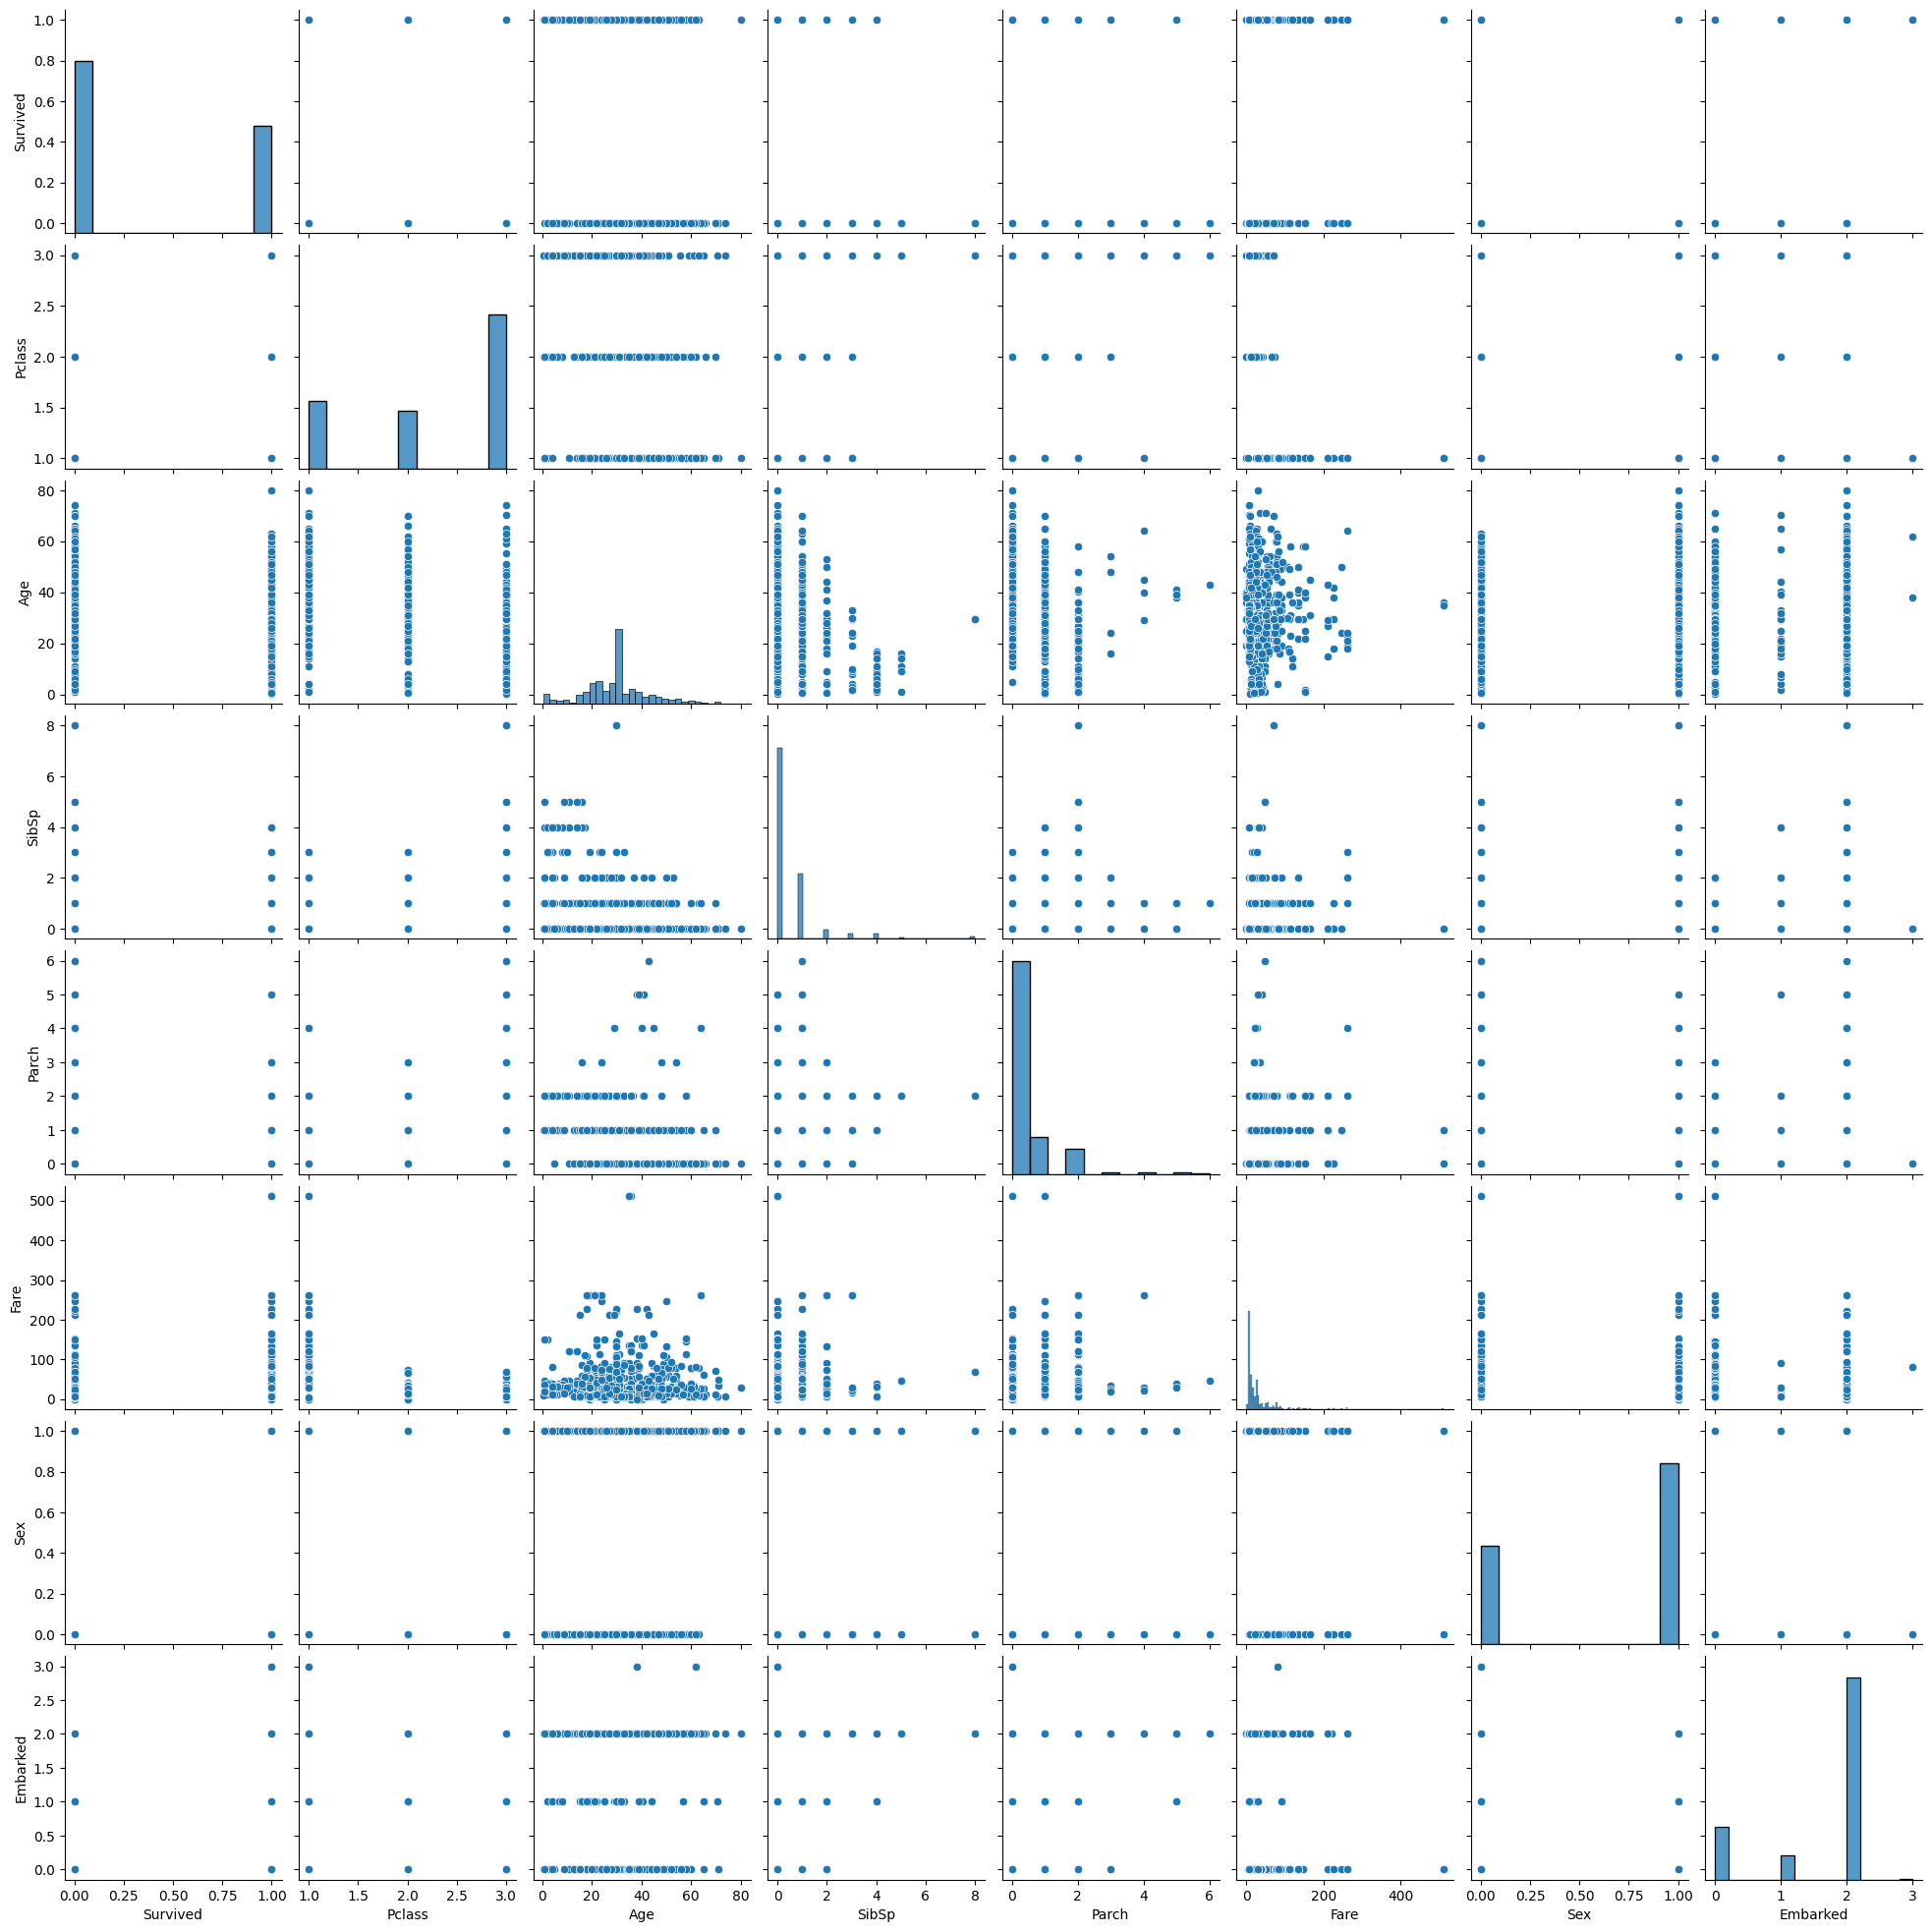

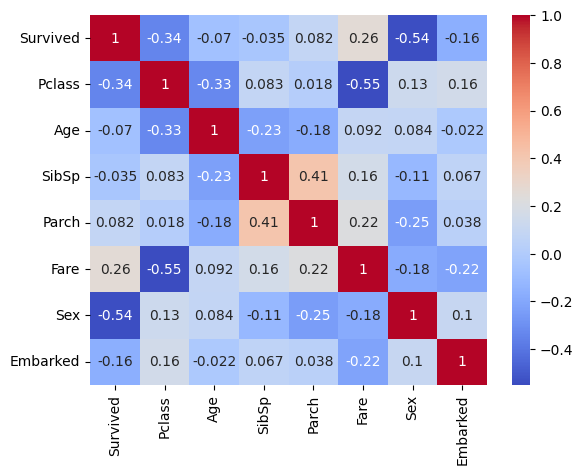

In [28]:
sns.pairplot(combined_df)
plt.show()

corr=combined_df.corr()
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.show()

# Trends from the dataset

* There is a strong negative correlation between Sex and Survived (-0.54), suggesting that female passengers had a significantly higher survival rate

* Pclass has a moderate negative correlation with Survived (-0.34), meaning passengers from higher classes had better chances of survival.

* The negative correlation between Pclass and Fare (-0.55) indicates that higher-class passengers generally paid more.

* A moderate positive correlation (0.41) between SibSp (number of siblings/spouses aboard) and Parch (number of parents/children aboard) suggests that people traveling with family were likely to be accompanied by multiple relatives.

* A weak positive correlation (0.26) between Fare and Survived suggests passengers who paid higher fares had a slightly better survival rate.

* Age has a negative correlation with Pclass (-0.33), indicating younger passengers were more likely to be in higher classes.

* The Embarked feature has weak correlations with other variables, implying that the port of boarding had little impact on survival.